In [3]:
import numpy as np
import seaborn as sns
import cv2
from matplotlib.pyplot import imshow
import tensorflow as tf
from skimage import transform
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
# Data paths
train_data_dir = 'E:\\AI_DATASET_2\\'
test_data_dir = 'E:\\AI_DATASET_TEST\\'

In [6]:
# Image parameters
img_width, img_height = 100, 100
batch_size = 32
epochs = 5

In [7]:
# Data augmentation for training set
rain_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
# Rescaling for test set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [9]:
# Loading the training data
train_generator = rain_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 223 images belonging to 2 classes.


In [10]:
# Loading the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 13 images belonging to 2 classes.


In [34]:
 model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

In [35]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 128)      

In [37]:
# Train the model
model.fit(train_generator, epochs=epochs)

Epoch 1/5
125/125 [==============================] - 57s 449ms/step - loss: 0.5485 - accuracy: 0.7408
Epoch 2/5
125/125 [==============================] - 72s 575ms/step - loss: 0.3286 - accuracy: 0.8670
Epoch 3/5
125/125 [==============================] - 52s 414ms/step - loss: 0.2667 - accuracy: 0.8890
Epoch 4/5
125/125 [==============================] - 53s 424ms/step - loss: 0.2637 - accuracy: 0.8925
Epoch 5/5
125/125 [==============================] - 52s 418ms/step - loss: 0.2368 - accuracy: 0.9078


In [12]:
model.evaluate(test_generator)

1/1 [==============================] - 4s 4s/step - loss: 0.3351 - accuracy: 0.8462


[0.3350629508495331, 0.8461538553237915]

In [13]:
# Evaluate the model on the test data
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_generator.classes

1/1 [==============================] - 4s 4s/step


In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.62%


In [15]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6 0]
 [2 5]]


In [16]:
cm = confusion_matrix(y_true, y_pred)

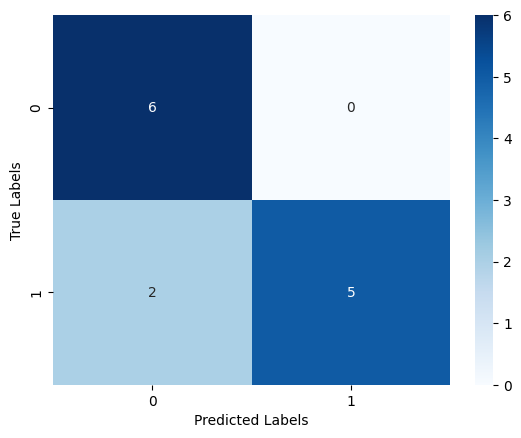

In [17]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

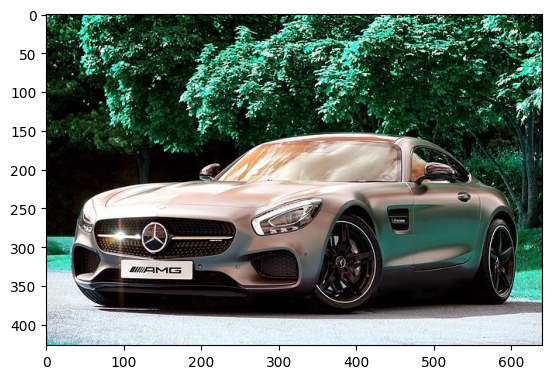

In [20]:
a = cv2.imread("1.jpg")
imshow(a)
b = transform.resize(a, (100,100))


In [21]:
prediction = model.predict(b.reshape(1,100,100,3))
print(prediction)
if prediction < 0.5:
    print("It's a bike")
else:
    print("It's a car")

1/1 [==============================] - 1s 825ms/step
[[0.99542725]]
It's a car


In [86]:
model.save("Abdul Mohiz.h5")

D:\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
model = load_model("Abdul Mohiz.h5")